# 4.4 Convergence of $\frac{1}{N_{M}} \left \Vert \mathbf{u}(\boldsymbol{\mu}) - \mathbf{u}_{DNN}(\boldsymbol{\mu}; \tilde{\boldsymbol{\Theta}})\right \Vert ^2$
## Table of convergence 
We compute the integral WRT x by the neural network and the integral WRT mu with Monte-Carlo, more precisely, we compute the error  $\frac{1}{N_{M}} \left \Vert \mathbf{u}(\boldsymbol{\mu}) - \mathbf{u}_{DNN}(\boldsymbol{\mu}; \tilde{\boldsymbol{\Theta}})\right \Vert ^2$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from functions import *
from time import perf_counter

K = 2
a = -1
b = 1


PATH_SAVE = "./table convergence/NN"

N_n = 10 #number of neurons
N_HL = 2
lr = 5*1e-4

N_hs = np.array([19, 29, 39, 49, 59])
N_Ms = np.array([10, 100, 1000])
print(N_hs)
print(N_Ms)

[19 29 39 49 59]
[  10  100 1000]


N_mu = 5

In [2]:
N_mu = 5
trials = 10
err = np.zeros((len(N_hs), len(N_Ms)))
time_NN_mean=np.zeros(len(N_hs))
time_New_mean=np.zeros(len(N_hs))

for l, N_h in enumerate(N_hs):
    h = 1/(N_h + 1)
    H = np.arange(1, N_h+1)*h
    net=Net(N_HL, N_n, N_h, N_mu).double()

    PATH_model = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
    net.load_state_dict(torch.load(PATH_model))

    
    for k, N_M in enumerate(N_Ms):
        print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
        integral_trials = np.zeros(trials)
        compute_time = False
        if k > len(N_Ms)-2:
            compute_time = True
            time_NN = np.zeros((trials, N_Ms[-1]))
            time_New = np.zeros((trials, N_Ms[-1]))

        for i in range(trials):
            Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N_M))
            I_Ns = np.zeros(N_M)
            for j in range(N_M):
                somme = fct(Mus[:,j], K)
                #NN sol:
                if compute_time == True:
                    time_start = perf_counter()
                y_pred = net((torch.from_numpy(Mus[:,j]))) 
                if compute_time == True:
                    time_end = perf_counter()
                    time_NN[i, j] = time_end - time_start

                #Newmark sol:
                if compute_time == True:
                    time_start = perf_counter()
                y_new, t = newmark(N_h, N_h, somme, h, h)
                if compute_time == True:
                    time_end = perf_counter()
                    time_New[i, j] = time_end - time_start

                #Exact sol: 
                uex = sol_given_fct2(somme)
                y_ex = (np.vectorize(uex))(H,t)

                #sum over x_j 
                I_Ns[j] = h * np.sum(((y_pred.detach().numpy()-y_ex))**2)
            #approximation of the integral:
            integral_trials[i] = np.mean(I_Ns) 
        #mean over N_trials:
        err[l, k] = np.mean(integral_trials)

    #save the mean time to compute the solutions:
    time_NN_mean[l] = np.mean(time_NN)
    time_New_mean[l] = np.mean(time_New)
    print("err : ", err[l])



N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
err :  [2.38314735e-07 1.73746452e-07 1.77381218e-07]
N_h =  29 h =  0.03333333333333333 , N_M =  10
N_h =  29 h =  0.03333333333333333 , N_M =  100
N_h =  29 h =  0.03333333333333333 , N_M =  1000
err :  [1.91314822e-07 2.27397117e-07 2.07034204e-07]
N_h =  39 h =  0.025 , N_M =  10
N_h =  39 h =  0.025 , N_M =  100
N_h =  39 h =  0.025 , N_M =  1000
err :  [4.32979219e-10 1.02465037e-08 6.03483896e-09]
N_h =  49 h =  0.02 , N_M =  10
N_h =  49 h =  0.02 , N_M =  100
N_h =  49 h =  0.02 , N_M =  1000
err :  [1.34670590e-08 3.46171138e-08 2.11369013e-08]
N_h =  59 h =  0.016666666666666666 , N_M =  10
N_h =  59 h =  0.016666666666666666 , N_M =  100
N_h =  59 h =  0.016666666666666666 , N_M =  1000
err :  [9.18583529e-07 1.00992478e-06 1.03625452e-06]


In [3]:
np.savetxt(PATH_SAVE + "/K = " + str(K) + "N_hs.dat", np.array(N_hs))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "N_Ms.dat", np.array(N_Ms))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat", np.array(err))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat", np.array(time_NN_mean))
np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat", np.array(time_New_mean))

\begin{tabular}{lll}
\toprule
    h &  N\_M &    Error \\
\midrule
0.050 &   10 & 2.38E-07 \\
0.050 &  100 & 1.74E-07 \\
0.050 & 1000 & 1.77E-07 \\
0.033 &   10 & 1.91E-07 \\
0.033 &  100 & 2.27E-07 \\
0.033 & 1000 & 2.07E-07 \\
0.025 &   10 & 4.33E-10 \\
0.025 &  100 & 1.02E-08 \\
0.025 & 1000 & 6.03E-09 \\
0.020 &   10 & 1.35E-08 \\
0.020 &  100 & 3.46E-08 \\
0.020 & 1000 & 2.11E-08 \\
0.017 &   10 & 9.19E-07 \\
0.017 &  100 & 1.01E-06 \\
0.017 & 1000 & 1.04E-06 \\
\bottomrule
\end{tabular}



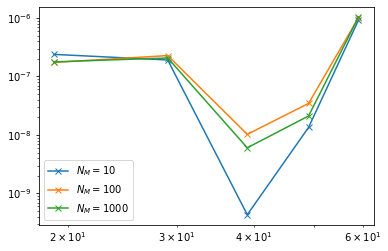

In [4]:
N_hs = np.genfromtxt(PATH_SAVE + "/K = " + str(K) +"N_hs.dat")
N_Ms = np.genfromtxt(PATH_SAVE + "/K = " + str(K) +"N_Ms.dat")
err = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat")
hs = 1/(N_hs + 1)
#create data
latex = to_latex(N_hs, N_Ms, err)
print(latex) 
legend = []

for i in range(len(N_Ms)):
    plt.plot(N_hs, err[:, i], '-x')
    plt.yscale('log')
    plt.xscale('log')
    legend.append(r"$N_M = $" +  str(int(N_Ms[i])))

plt.legend(legend)
#plt.savefig(fname="./Figures/table convergence/NN N_mu =" + str(N_mu) + " K = "+ str(K))
plt.show()

Time taken to compute the solutions

In [5]:
print(time_NN_mean)
print(time_New_mean)

[0.00019902 0.00019565 0.00021173 0.00019913 0.00022301]
[0.0009737  0.0019479  0.0032314  0.00485517 0.00722527]


# We verify that the convergence is respect for different number of parameters (vary N_mu)

In [2]:
N_n = 10 #number of neurons
N_HL = 2
lr = 5*1e-4

N_hs = np.array([19, 29, 39, 49, 59])
N_Ms = np.array([10, 100, 1000])
N_mus = [10, 15, 20, 25]

trials = 10


for N_mu in N_mus:
    err = np.zeros((len(N_hs), len(N_Ms)))
    time_NN_mean=np.zeros(len(N_hs))
    time_New_mean=np.zeros(len(N_hs))

    for l, N_h in enumerate(N_hs):
        h = 1/(N_h + 1)
        H = np.arange(1, N_h+1)*h
        net=Net(N_HL, N_n, N_h, N_mu).double()

        PATH_model = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
        net.load_state_dict(torch.load(PATH_model))

        
        for k, N_M in enumerate(N_Ms):
            print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
            integral_trials = np.zeros(trials)
            compute_time = False
            if k > len(N_Ms)-2:
                compute_time = True
                time_NN = np.zeros((trials, N_Ms[-1]))
                time_New = np.zeros((trials, N_Ms[-1]))

            for i in range(trials):
                Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N_M))
                I_Ns = np.zeros(N_M)
                for j in range(N_M):
                    somme = fct(Mus[:,j], K)
                    #NN sol:
                    if compute_time == True:
                        time_start = perf_counter()
                    y_pred = net((torch.from_numpy(Mus[:,j]))) 
                    if compute_time == True:
                        time_end = perf_counter()
                        time_NN[i, j] = time_end - time_start

                    #Newmark sol:
                    if compute_time == True:
                        time_start = perf_counter()
                    y_new, t = newmark(N_h, N_h, somme, h, h)
                    if compute_time == True:
                        time_end = perf_counter()
                        time_New[i, j] = time_end - time_start

                    #Exact sol: 
                    uex = sol_given_fct2(somme)
                    y_ex = (np.vectorize(uex))(H,t)

                    #sum over x_j 
                    I_Ns[j] = h * np.sum(((y_pred.detach().numpy()-y_ex))**2)
                #approximation of the integral:
                integral_trials[i] = np.mean(I_Ns) 
            #mean over N_trials:
            err[l, k] = np.mean(integral_trials)

        #save the mean time to compute the solutions:
        time_NN_mean[l] = np.mean(time_NN)
        time_New_mean[l] = np.mean(time_New)
        print("err : ", err[l])
    
    #save the data
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat", np.array(err))
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat", np.array(time_NN_mean))
    np.savetxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat", np.array(time_New_mean))


    

N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
err :  [1.67644117e-05 1.68770210e-05 1.78570098e-05]
N_h =  29 h =  0.03333333333333333 , N_M =  10
N_h =  29 h =  0.03333333333333333 , N_M =  100
N_h =  29 h =  0.03333333333333333 , N_M =  1000
err :  [5.01270786e-05 4.56780120e-05 4.70057901e-05]
N_h =  39 h =  0.025 , N_M =  10
N_h =  39 h =  0.025 , N_M =  100
N_h =  39 h =  0.025 , N_M =  1000
err :  [9.00770507e-05 8.85834450e-05 8.80795986e-05]
N_h =  49 h =  0.02 , N_M =  10
N_h =  49 h =  0.02 , N_M =  100
N_h =  49 h =  0.02 , N_M =  1000
err :  [1.51037473e-05 1.78778682e-05 1.88757011e-05]
N_h =  59 h =  0.016666666666666666 , N_M =  10
N_h =  59 h =  0.016666666666666666 , N_M =  100
N_h =  59 h =  0.016666666666666666 , N_M =  1000
err :  [4.44880565e-05 4.45297539e-05 4.43569209e-05]
N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  1000
err :  [7.76652364e-05 7.82434543e-05 7.

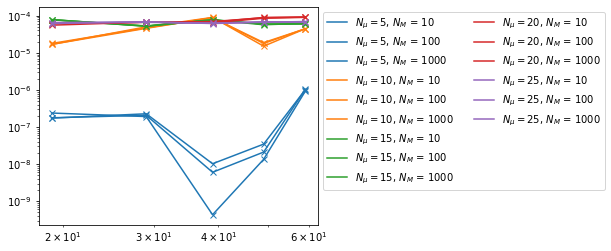

mean slopes :  [-0.25040846  0.45324086 -0.15216174  0.38921297  0.04202439]


In [10]:
N_mus = [5, 10, 15, 20, 25]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
legend = []
custom_lines = []
slopes_N_mu = np.zeros(len(N_mus))
fig = plt.figure(figsize=(5, 4))

for i, N_mu in enumerate(N_mus):
        err = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat")
        slopes = np.zeros((len(N_Ms)))
        for j in range(len(N_Ms)):
            plt.plot(N_hs, err[:, j], '-x', color = colors[i])
            slopes[j], _= np.polyfit(np.log(N_hs), np.log(err[:, j]), 1)
            legend.append(r"$N_\mu = $" +  str(N_mu)+ r", $N_M$ = " + str(int(N_Ms[j])))
            custom_lines.append(Line2D([0], [0], color=colors[i]))
        slopes_N_mu[i] = np.mean(slopes)

for i in range(2):
    legend.append("")
    custom_lines.append(Line2D([0], [0], color='w'))
    plt.plot(np.zeros(1), np.zeros([1,3]), color='w', alpha=0, label=' ')

plt.yscale('log')
plt.xscale('log')
plt.legend(custom_lines, legend, bbox_to_anchor=(1.,1.), ncol = 2)
#plt.savefig(fname="./Figures/table convergence/NN_varying_N_mu K = " + str(K))
plt.show()
print("mean slopes : ", slopes_N_mu)

In [38]:
all_errors = np.zeros((len(N_hs), len(N_Ms), len(N_mus)))
for k, N_mu in enumerate(N_mus):
    all_errors[:,:,k] = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "err_N_mu= " + str(N_mu) + ".dat")
N_mus = [5, 10, 15, 20, 25]
N_hs = [19, 29, 39, 49, 59]
Hs = [0.05, 0.033, 0.025, 0.020, 0.017]
N_Ms = [10, 100, 1000]

midx = pd.MultiIndex.from_product([Hs, N_Ms],
         names=["h", "N_M"])

df = pd.DataFrame(all_errors.reshape(len(N_hs)*len(N_Ms), len(N_mus)), index = midx, columns=N_mus).applymap('{:.2E}'.format)
df

5         10        15        20        25
h     N_M                                                   
0.050 10    2.38E-07  1.68E-05  7.77E-05  5.56E-05  6.14E-05
      100   1.74E-07  1.69E-05  7.82E-05  6.17E-05  6.56E-05
      1000  1.77E-07  1.79E-05  7.88E-05  6.10E-05  6.44E-05
0.033 10    1.91E-07  5.01E-05  5.24E-05  6.72E-05  6.87E-05
      100   2.27E-07  4.57E-05  5.31E-05  6.66E-05  6.75E-05
      1000  2.07E-07  4.70E-05  5.20E-05  6.67E-05  6.62E-05
0.025 10    4.33E-10  9.01E-05  7.71E-05  6.40E-05  6.16E-05
      100   1.02E-08  8.86E-05  7.81E-05  6.97E-05  6.23E-05
      1000  6.03E-09  8.81E-05  7.76E-05  6.69E-05  6.30E-05
0.020 10    1.35E-08  1.51E-05  5.70E-05  8.55E-05  6.68E-05
      100   3.46E-08  1.79E-05  5.96E-05  8.79E-05  6.74E-05
      1000  2.11E-08  1.89E-05  5.93E-05  8.99E-05  6.84E-05
0.017 10    9.19E-07  4.45E-05  6.24E-05  9.02E-05  6.97E-05
      100   1.01E-06  4.45E-05  6.00E-05  9.21E-05  6.64E-05
      1000  1.04E-06  4.44E-05  6.03E-05  9.19E-05  6.75E-05

# Time 

In [39]:
all_time = np.zeros((len(N_mus), 2, len(N_hs)))
for k, N_mu in enumerate(N_mus):
    all_time[k, 0, :] = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "time_NN_N_mu= " + str(N_mu) + ".dat")
    all_time[k, 1, :] = np.genfromtxt(PATH_SAVE + "/K = " + str(K) + "time_New_N_mu= " + str(N_mu) + ".dat")
N_mus = [5, 10, 15, 20, 25]
N_hs = [19, 29, 39, 49, 59]
models = ['NN', 'Newmark']

midx = pd.MultiIndex.from_product([N_mus,models],
         names=["N_mu", "Model"])

df = pd.DataFrame(all_time.reshape(len(N_mus)*2, len(N_hs)), index = midx, columns=N_hs).applymap('{:.4f}'.format)
df

19      29      39      49      59
N_mu Model                                          
5    NN       0.0002  0.0002  0.0002  0.0002  0.0002
     Newmark  0.0010  0.0019  0.0032  0.0049  0.0072
10   NN       0.0002  0.0002  0.0002  0.0002  0.0002
     Newmark  0.0010  0.0018  0.0030  0.0046  0.0066
15   NN       0.0002  0.0002  0.0002  0.0002  0.0002
     Newmark  0.0009  0.0018  0.0030  0.0045  0.0064
20   NN       0.0002  0.0002  0.0002  0.0002  0.0002
     Newmark  0.0009  0.0018  0.0030  0.0045  0.0064
25   NN       0.0002  0.0002  0.0002  0.0002  0.0002
     Newmark  0.0009  0.0018  0.0030  0.0046  0.0065